# Project: Investigate the Movie Database (tmdb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including popularity score and revenue. Having looked at the data, we have information about a movie's cast, crew, release date, ratings, budget and revenue. From my study and investigation of this dataset, I am interested in finding out the following:
<ul>
<li><a href="#top10"> Which are the ten most favoured genres by production companies?</a></li>
<li><a href="#Popular movie"> Through out the years, which movie was the most watched and liked? </a></li>
<li><a href="#movie success"> What factors contribute to success of a movie? What influences viewers to watch movies and decided it is a good movie? </a></li>
</ul>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# checking the number of features and examples in the dataset
df.shape

(10866, 21)

>**Summary**: The movie dataset has been loaded and viewed. We can see that dataframe is consist of $10866$ rows representing movie samples and $21$ columns representing features. Amongst the columns, *cast*, *genres* and *production_companies* contain textual data separated by $|$. Other columns do not have any unsualities that can be seen from just viewing a part of the dataset so we will search for anomalies and clean the data before we carry with the analysis.

In [4]:
# Checking for missing values and incorrect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>**Summary**: The info shows there are several issues with the dataset. Firstly, most features have missing values. For example, since the id column has 10866 entries, it is sufficient to assume there are about 10866 samples of movies in the dataset. However, columns such as *homepage, tagline, keywords and production companies* have missing values with *homepage* having literally about $70\%$ missing entries. Since there is no other information about this columns to fill in the missing values and they will be further investigated. However, *homepage* will be dropped compeletely.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>**Summary**: From above, the budget and revenue seem to have a large number of movies with $0$ *budget* and *revenue*. We believe these are missing values since there has to be incurred costs for making every movie and some revenue generated even if there was a loss. These two features will not to be used in the analysis since we are not interested in profits made from movies, so it will not hurt our results in anyway if these two columns are trimmed out of the dataset along with *budget_adj* and *revenue_adj*. Runtime on the hand will be a part of the analysis and it also have missing values since every movie runs for more than $0$ minutes. These missing values will be further investigated.

In [7]:
df.query('runtime == 0').describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,31.000000,31.000000,3.100000e+01,31.0,31.0,31.000000,31.000000,31.000000,3.100000e+01,31.0
mean,176589.096774,0.186411,3.629032e+05,0.0,0.0,20.838710,5.509677,2010.612903,4.032336e+05,0.0
std,130298.949032,0.333162,1.244720e+06,0.0,0.0,15.358161,0.860757,4.528999,1.435415e+06,0.0
min,13713.000000,0.006440,0.000000e+00,0.0,0.0,10.000000,3.400000,2000.000000,0.000000e+00,0.0
25%,45336.000000,0.041329,0.000000e+00,0.0,0.0,12.000000,5.100000,2008.500000,0.000000e+00,0.0
50%,173847.000000,0.096455,0.000000e+00,0.0,0.0,15.000000,5.500000,2012.000000,0.000000e+00,0.0
75%,292733.500000,0.174179,0.000000e+00,0.0,0.0,25.000000,5.850000,2014.000000,0.000000e+00,0.0
max,370687.000000,1.876037,6.000000e+06,0.0,0.0,80.000000,7.500000,2015.000000,7.273568e+06,0.0


>**Summary**: After thorough investigation of movies with runtime of $0$, we can see that these data entries all have missing *budget* and/or *revenue* values but the same movies were voted for and scored a significant popularity percentages. As a consequence, we conclude that these are definitely missing data and it sufficient to remove them from our dataset. Also, there's only a few of them ($31$ samples) therefore there will be no negative impact on our data in terms of size.


### Data Cleaning 
<ul>
<li> We will remove all the columns we do need for our analysis </li>
<li> We will get rid of sample entries with missing values </li>
<li> We will remove duplicted sample entries  </li>
<li> We will separate the genres into single independent genre instead of grouped  </li>    
</ul>

In [8]:
# Trimming the features not to be used in this analysis
df.drop(['id','imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview','cast', 'director', 'keywords', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [9]:
# Remove all missing values 
df.dropna(how='any', inplace=True)

In [10]:
# Remove the rows with 0 runtime
df.query('runtime != 0', inplace=True)

In [11]:
# Remove duplicated samples
df.drop_duplicates(inplace=True)

In [12]:
# Separating genres and creating a column for each
genre_dummies = df['genres'].str.get_dummies()
genre_dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
# Concactenating the dummies dataframe with the movies dataframe
df = (pd.concat([df, genre_dummies], axis=1).drop(['genres'], axis=1))

>**Note**: The above method of separating genres was taken from a github source code cited below.
>*Citation*:"https://github.com/CodingNomads/movie-analysis-python-pandas"

In [14]:
# Revised dataframe
df.head(5)

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,Furious 7,137,4/1/15,2947,7.3,2015,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10812 non-null  float64
 1   original_title   10812 non-null  object 
 2   runtime          10812 non-null  int64  
 3   release_date     10812 non-null  object 
 4   vote_count       10812 non-null  int64  
 5   vote_average     10812 non-null  float64
 6   release_year     10812 non-null  int64  
 7   Action           10812 non-null  int64  
 8   Adventure        10812 non-null  int64  
 9   Animation        10812 non-null  int64  
 10  Comedy           10812 non-null  int64  
 11  Crime            10812 non-null  int64  
 12  Documentary      10812 non-null  int64  
 13  Drama            10812 non-null  int64  
 14  Family           10812 non-null  int64  
 15  Fantasy          10812 non-null  int64  
 16  Foreign          10812 non-null  int64  
 17  History     

In [16]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,Action,Adventure,Animation,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,...,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000,10812.000000
mean,0.648730,102.421846,218.369404,5.975379,2001.288938,0.220311,0.135960,0.064650,0.349797,0.125139,...,0.030892,0.150666,0.037088,0.074732,0.157695,0.113578,0.015168,0.268683,0.024972,0.015261
std,1.001976,30.871363,576.886018,0.934122,12.819746,0.414475,0.342762,0.245919,0.476928,0.330891,...,0.173032,0.357739,0.188987,0.262970,0.364472,0.317312,0.122228,0.443295,0.156048,0.122594
min,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209045,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.385298,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.716608,112.000000,146.000000,6.600000,2011.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Summary of data cleaning process

> We can see that the data is thoroughly cleaned, there are no missing values, no duplicated and no anomalies in runtime such as a runtime of $0$ minutes

<a id='eda'></a>
## Exploratory Data Analysis

### Number of movies released per year

In [17]:
# count movies release per year
release_per_year = df.groupby('release_year').count()['original_title']
release_per_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: original_title, dtype: int64

<a id='top10'></a>
### Top ten favoured genres

> We will identify the top ten genres with the highest number of movies in them, and filter them out. These genres will be refered to as top ten favoured genres. 

In [18]:
# Top ten genres by the total number of movies
top_ten_genre = df.iloc[:, 7:]     # getting the genre columns only
top_ten_genre = top_ten_genre.sum().sort_values(ascending=False) # sum and sort descending
top_ten_genre = top_ten_genre.head(10).index.values # Getting the genre names only

In [19]:
top_ten_genre

array(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction'], dtype=object)

In [20]:
# Grouping top ten genres according to the year of release
genre_groups = (df.iloc[:, 6:].groupby('release_year').sum()).loc["1960":"2015",top_ten_genre]
genre_groups.tail()

,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,Science Fiction
release_year,,,,,,,,,,
2011,214,172,146,115,73,77,62,48,72,56
2012,231,174,160,99,78,104,50,54,42,54
2013,253,172,174,121,63,99,67,70,48,60
2014,283,184,178,129,83,104,67,65,43,62
2015,258,161,171,106,57,122,68,51,44,86


<AxesSubplot:title={'center':'Total Number of Movies'}, xlabel='release_year'>

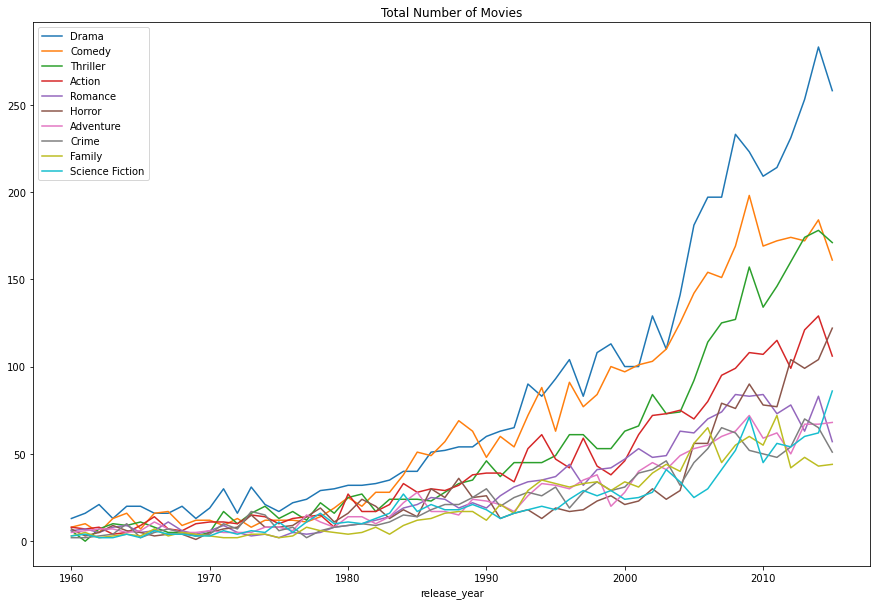

In [21]:
# Visualising rating trends of genres over the years
genre_groups.plot(figsize=(15,10), title="Total Number of Movies")

>**Interpretation**: Amongst all the genres, *Drama* and *Comedy* are the winners of most favoured genres, with *Thriller* catching up with *Comedy* towards the latest years. This makes sense because the data set contains TV shows as well and most TV shows in general fall amongst top two genres. *Thriller* is slowly becoming favoured as well and I personally think it is being used to slowly replace *horror* which can be unwatchable for some viewers who still want the elicit tension but not get extremely horrified. On the other hand, *Science Fiction* is only gaining popularity lately and more movies are being released and this is probably because of technology and its innovation.

<a id='Popular movie'></a>
### Most popular movie

> We will identify which movie has the highest popularity value.

In [22]:
most_popular_movie = df.query('popularity == 32.985763')
most_popular_movie

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1,1,0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
release_per_year.tail()

release_year
2011    537
2012    582
2013    651
2014    696
2015    620
Name: original_title, dtype: int64

>**Interpretation**: The most popular movie is *Jurassic World*. Looking at the features of this movie, it has the highest popularity score, its runtime falls in the upper quartile as well as the vote count and a median vote average. *Jurasic World* was the most popular movie amongst the $620$ movies released in $2015$. The movie falls under $4$ genres namely, action, adventure, science fiction as well as thriller, which happen to be amongst the top ten favoured genres as well.

>**Key Takeaway**: From the mentioned facts about the most popular movie, we would like to find out the relationship between *popularity* and *runtime*, *release_year*, and *vote_count*.

<a id='movie success'></a>
### What factors lead to popularity of movies?

>The more popular a movie gets, the more it gets streamed and watched, and that leads to a successful movie. Success normally means high profits. In stead of measuring success with generated revenue and/or budget used to create a movie, we are curious to know how basic qualities of a movie lead to its success. We will try to answer the following questions:

<ul>
<li> Does runtime contribute to popularity of a movie? </li>
<li> Is the year a movie was released in play a role in popularity? </li>
<li> Does user rating affect popularity of a movie?  </li>
</ul>


#### Relationship between runtime and popularity

> We will see how runtime impacts the popularity of a movie. Whether there is any difference between longer and shorter movies in terms of popularity.

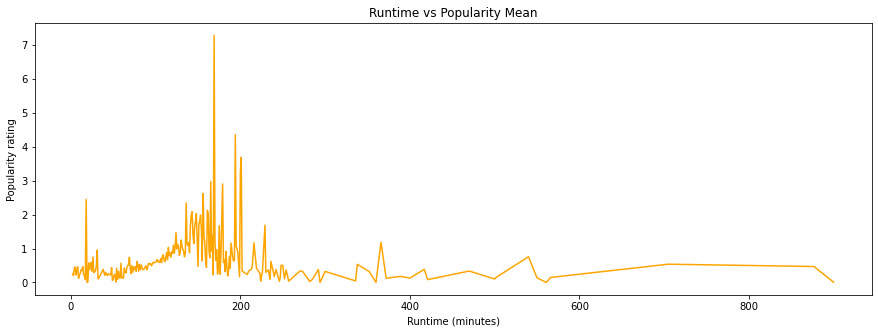

In [24]:
# plot runtime vs Popularity mean
plt.figure(figsize=(15, 5))
mean_popularity_per_runtime = df.groupby('runtime').mean()['popularity']

plt.plot(mean_popularity_per_runtime.index, mean_popularity_per_runtime, color='orange')
plt.title('Runtime vs Popularity Mean')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Popularity rating');

In [25]:
#plotting scatter plots
def scatter_plot(x, y): 
    """ This function plots a scatter plot of two variables x and y. 
         x and y and strings, they require to be input as strings, i.e in quotations marks"""
    plt.figure(figsize=(15, 5))
    
    title = plt.title(x + ' vs ' + y)
    x_label = plt.xlabel(x)
    y_label = plt.ylabel(y)
    plot = plt.scatter( df[x], df[y], color='blue')
    return(plot)
    

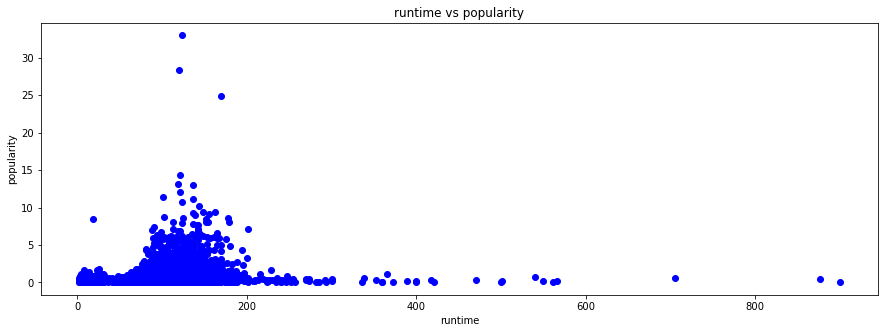

In [26]:
# plot runtime vs popularity
scatter_plot('runtime', 'popularity')

>**Interpretation**: The graph shows a curve with a sharp peak but not easy to read. On the other hand, on the scatter plot, we can see that most movies are cetered around about the same runtime which is between $0-200$ minutes, with rising popularity scores. There are outliers as well in this runtime range where three movies are highly popular, including the most popular movie. People prefer movies with runtime of about $120$ minutes on average with less preference for too short and too long movies. We can conclude that whether a movie is longer or shorter, it does not necessarily mean it will be popular and/or successful. Therefore, movie runtime does not have a significant linear relationship with popularity of movies. 

#### Relationship between release year and popularity

> We will see how the year of release impacts the popularity of a movie. Whether there is any difference between movies released back in the days and movies released later as the years added up, in terms of how popular they are.

In [27]:
runtime_bins = [1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015]
bin_names = ['1960-1965','1965-1970','1970-1975', '1975-1980', '1980-1985', '1985-1990', '1990-1995', '1995-2000', '2000-2005','2005-2010','2010-2015']
df['half_decade'] = pd.cut(df['release_year'], runtime_bins, labels=bin_names)

In [28]:
# We will plot number of movies and total popularity side by side 
popularity_over_five_years = df.groupby('half_decade').popularity.mean()
num_of_movies_over_five_years = df['half_decade'].value_counts(ascending=True)

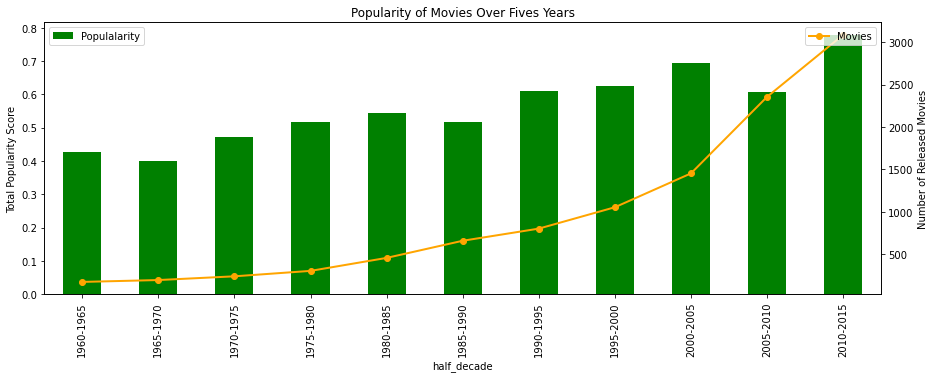

In [29]:
# Create two axes for the chart 
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111) 
ax2 = ax.twinx()      

#plot popularity over five years and number of released movies in five years
num_of_movies_over_five_years.plot(kind='line', color='orange', ax=ax2, linestyle='-', marker='o', linewidth=2.0)
popularity_over_five_years.plot(kind='bar', color='green', ax=ax)

ax.set_ylabel('Total Popularity Score')
ax2.set_ylabel('Number of Released Movies')
plt.title('Popularity of Movies Over Fives Years')
ax.legend(['Populalarity'],loc=2)
ax2.legend(['Movies'], loc=1);
#plt.legend();

>**Interpretation**: The bar char shows that there are definitely more movies released as the years progress which is expected as entertainment and technology are becoming popular and innovative daily. Regardless of progressive increase in movies produced, popularity seems to have a flactuating but increasing trend on average. It is not sufficient to conclude that releasing a movie in the latest years will result in its success in terms of popularity, thus we will look at popularity of movies on a scatter plot.

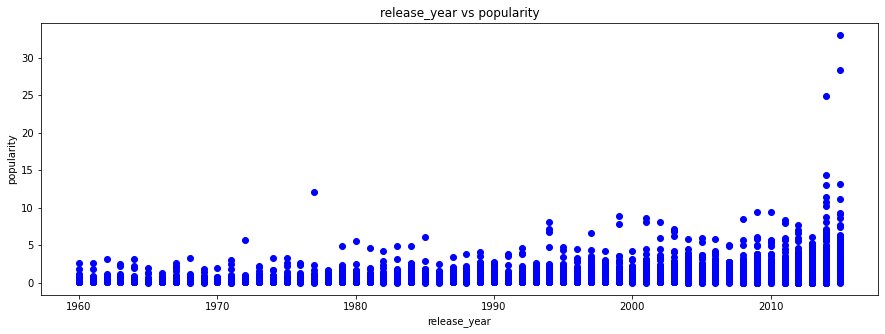

In [30]:
# plot release year vs popularity
scatter_plot('release_year', 'popularity')

>**Interpretation**: It can be seen that most movies lie at the lower levels of popularity with a few anomalus movies being highly popular regardless of their year of release. We conclude that year of release does not play a role in popularity of movies. We do not dispute the fact that as the years progress, it gets easier to discover and gain access to movies. There are other factors such as social media which also plays a role in promoting movies and that results in people getting influenced and actually watching the movies. There possibly more other factors.

#### Relationship between vote count and popularity

> We will now see how the viewer votes for a movie impact its popularity using a scatter plot. 

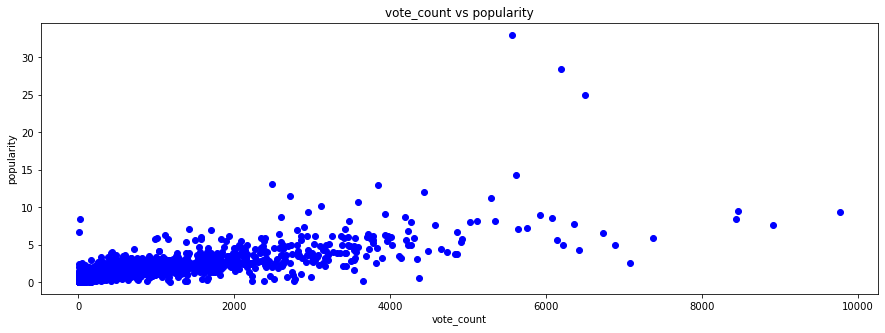

In [31]:
# plot vote count vs popularity
scatter_plot('vote_count', 'popularity')

>**Interpretation**: From the plot, vote count has a positive correlation with popularity and that means, when vote count increases, popularity increases. The more votes casted on a movie means there are more people watching that movie and subsequently results in that movie becoming more famous. Therefore, in this case, correlation implies causation. 

<a id='conclusions'></a>
## Conclusions
>**My investigation goals were to answer three major questions:**
<ul>
<li>Which are the ten most favoured genres by the production companies?</li>
    
    From the analysis, we saw the ten genres with the highest volume of movies and we also saw some genres slowly rising in the most recent past to catch up with the forever highly favoured genres Drama and Action. 
    
<li> Through out the years, which movie was the most watched and liked? </li>
    
<li> What factors contribute to success of a movie? What influences viewers to watch movies and decided it is a good movie? </li>
    
    For this question, we decided to choose popularity as a measure of success for movies and explored the possible explanatory factors that lead to a movie becoming popular. After thorough investigations, we conclude that popular movies indeed have significant features worth identifying:
<ul>
<li>Most popular movies have a runtime of around $120-140$ minutes and receive high vote counts. </li>
 <li> Most movies had about the same popularity level, however popularity seemed to have a positive increasing trend as years progress but we are hesitant to conclude that the release year is a cause of popularity. We believe there is a relationship but there are other factors which might be cause of popularity of movies as years progress </li>   
</ul>
</ul>

>**Limitations of this study**

One limitation is the quality of the data. The study and conclusions are limited by the quality of the data. It was seen in wrangling phase that, there were lots of missing data especially the budget and revenue which could have been incorporated to investigated success in terms of profits. The two features would have required a lot of assumptions if they we ever included in the study. Also, it would have been ineffective to trim samples with missing values because we would have lost more than half of the dataset. 



